D:\conda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


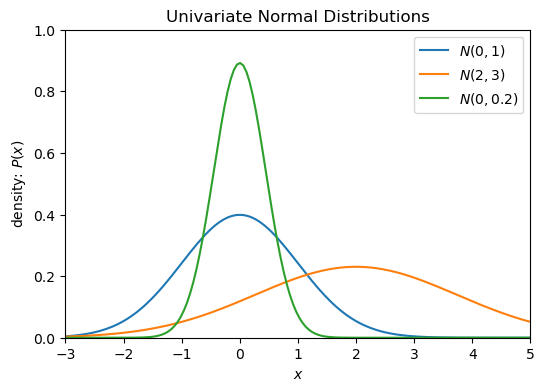

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-3, 5, 150)
params = [(0, 1, "$N(0,1)$"), (2, 3, "$N(2,3)$"), (0, 0.2, "$N(0,0.2)$")]

fig, ax = plt.subplots(figsize=(6, 4))

for mean, variance, label in params:
    pdf = norm.pdf(x, loc=mean, scale=np.sqrt(variance))
    ax.plot(x, pdf, label=label)

ax.set_title("Univariate Normal Distributions")
ax.set_xlabel("$x$")
ax.set_ylabel("density: $P(x)$")
ax.set_xlim((-3, 5))
ax.set_ylim((0, 1))
ax.legend()

plt.show()

# multivariate

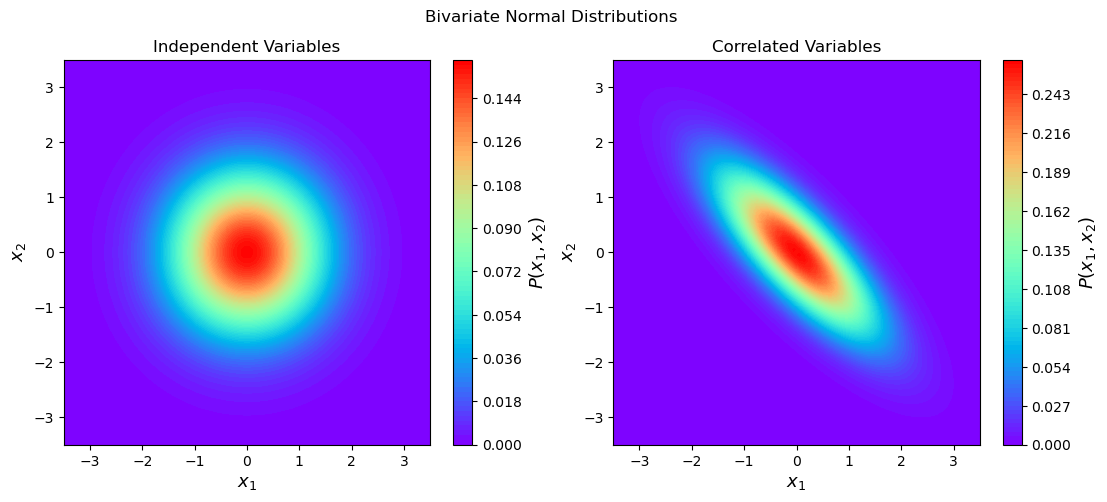

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def generate_surface(mean, cov):
    x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
    x1, x2 = np.meshgrid(x, y)
    pos = np.dstack((x1, x2))
    pdf = multivariate_normal(mean=mean, cov=cov).pdf(pos)
    return x1, x2, pdf

distributions = [
    (np.array([0, 0]), np.eye(2)),
    (np.array([0, 0]), np.array([[1, -0.1], [-0.8, 1]]))
]

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
plt.suptitle("Bivariate Normal Distributions")
ax[0].set_title("Independent Variables")
ax[1].set_title("Correlated Variables")

for i, dist in enumerate(distributions):
    x1, x2, pdf = generate_surface(dist[0], dist[1])
    con = ax[i].contourf(x1, x2, pdf, 100, cmap='rainbow')
    ax[i].set_xlabel("$x_1$", fontsize=13)
    ax[i].set_ylabel("$x_2$", fontsize=13)
    ax[i].axis([-3.5, 3.5, -3.5, 3.5])
    c_bar = fig.colorbar(con, ax=ax[i])
    c_bar.ax.set_ylabel("$P(x_1, x_2)$", fontsize=13)

plt.show()